In [110]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [111]:
m1 = 2.8
m2 = 23
d1 = 0.21
d2 = 0.13

F0 = 279
F1 = 149
nM = 600
omega1 = 2*np.pi*nM/60
print(f'omega1: {omega1:.3f}')
print(f'phi2/phi1 ) {d1/d2:.4f} (d2/d1)')

omega1: 62.832
phi2/phi1 ) 1.6154 (d2/d1)


$$\Sigma M = J \cdot \ddot{\phi}$$
$$J = J_1 + J_2$$
$$\Sigma M = F \cdot \frac{d_1}{2}$$

In [112]:
J1 = 1/2 * m1 * 1/4 * d1**2
J2 = 1/2 * m2 * 1/4 * d2**2
J = J1 + J2
print(f'J1 = {J1:.6f} kgm^2')
print(f'J2 = {J2:.6f} kgm^2')
print(f'J = {J:.6f} kgm^2')
print(f'd1/(2*J) = {d1/(2*J):.4f}')

J1 = 0.015435 kgm^2
J2 = 0.048588 kgm^2
J = 0.064023 kgm^2
d1/(2*J) = 1.6400


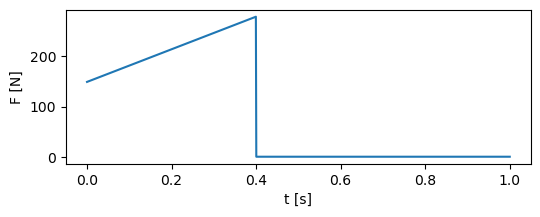

In [113]:
t = np.linspace(0, 1, 1000)
t1 = 0.4
Ft = np.zeros_like(t)
Ft[:400] = (F0 - F1)/t1 * t[:400] + F1

fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(t, Ft)
ax.set_xlabel('t [s]')
ax.set_ylabel('F [N]');

In [114]:
import sympy as sp
J, t, d1, F0, F1, t1, omega1 = sp.symbols('J t d1 F0 F1 t1 omega1')
F = ((F0 - F1) / t1) * t + F1
M = d1/2 * F
ddphi = M/J 
print(f'ddphi = \n\n')
sp.pprint(ddphi)

ddphi = 


   ⎛     t⋅(F₀ - F₁)⎞
d₁⋅⎜F₁ + ───────────⎟
   ⎝          t₁    ⎠
─────────────────────
         2⋅J         


In [115]:
dphi = sp.integrate(ddphi, t)
print(f'dphi = \n\n')
sp.pprint(dphi)
dphi_t1 = sp.integrate(ddphi, (t, 0, t1))
sp.pprint(dphi_t1)
# sp.pretty(dphi_t1)
t1 = sp.solve(dphi_t1 - omega1, t1)[0]
print(t1)
# print()
# print()
# sp.pretty(t1)
F0N = 279
F1N = 149
d1N = 0.21
omega1N = 2*np.pi*nM/60
t1_n = t1.subs({F0: F0N, F1: F1N, d1: d1N, omega1: omega1N, J: J1+J2})
t1_n
# print(f't1 = {t1_n:.4f} s')
# # print(f't1 = {t1:.4f} s')
# # phi = sp.integrate(dphi, t)
# # sp.pprint(phi)

dphi = 


           2                
F₁⋅d₁⋅t   t ⋅(F₀⋅d₁ - F₁⋅d₁)
─────── + ──────────────────
  2⋅J           4⋅J⋅t₁      
F₁⋅d₁⋅t₁   t₁⋅(F₀⋅d₁ - F₁⋅d₁)
──────── + ──────────────────
  2⋅J             4⋅J        
4*J*omega1/(d1*(F0 + F1))


0.179023244917181

In [116]:
print(f'phi2/phi1 ) {d1/d2:.4f} (d2/d1)')

TypeError: unsupported format string passed to Mul.__format__

In [ ]:
F = ((F0 - F1) / t1) * t + F1
integral = sp.integrate(F, (t, 0, t1))
sp.pprint(integral)

        t₁⋅(F₀ - F₁)
F₁⋅t₁ + ────────────
             2      


In [ ]:
J, t, d1, F0, F1, t1, omega1 = sp.symbols('J t d1 F0 F1 t1 omega1')
F = ((F0 - F1) / t1) * t + F1
M = d1/2 * F
ddphi = M/J 
integral = sp.integrate(ddphi, t)

# Solve for t1 symbolically
solution = sp.solve(integral - omega1, t1)
# sp.pprint(solution)

# Substitute values to find the numeric value of t1
# F0 = 279
# F1 = 149
nM = 600
# omega1 = 2*np.pi*nM/60

F0_val = 279
F1_val = 149
omega1_val = 2*np.pi*nM/60

t1_symbolic = solution[0]
sp.pprint(t1_symbolic)
t1_numeric = solution[0].subs({F0: F0_val, F1: F1_val, omega1: omega1_val})
print()
print("Numeric value of t1:", t1_numeric * d1/(2*J))

   4⋅J⋅ω₁   
────────────
d₁⋅(F₀ + F₁)

Numeric value of t1: 0.293606790055121
